 Import the necessary libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Set up the dataset and data augmentation

In [6]:
# Define the path to your train folder containing three sub-folders (one for each class).
train_path = 'train'

# Set up data augmentation to improve the model's performance and prevent overfitting.

datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values between 0 and 1
    rotation_range=20,    # Randomly rotate images within 20 degrees
    width_shift_range=0.1,  # Randomly shift the width of images by 10%
    height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Randomly zoom in images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill missing pixels with the nearest value
)

# Load and augment the images from the train directory.
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),  # Resize the images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)


Found 251 images belonging to 3 classes.


Create the CNN model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(3, activation='softmax')  # 3 classes
])

Compile the model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


 Train the model

In [9]:
epochs = 10  
model.fit(train_generator, epochs=epochs)


Epoch 1/10
8/8 [==============================] - 11s 591ms/step - loss: 1.2229 - accuracy: 0.3108
Epoch 2/10
8/8 [==============================] - 6s 740ms/step - loss: 0.9302 - accuracy: 0.5618
Epoch 3/10
8/8 [==============================] - 6s 720ms/step - loss: 0.6032 - accuracy: 0.7291
Epoch 4/10
8/8 [==============================] - 7s 929ms/step - loss: 0.6567 - accuracy: 0.7530
Epoch 5/10
8/8 [==============================] - 5s 674ms/step - loss: 0.6092 - accuracy: 0.7171
Epoch 6/10
8/8 [==============================] - 6s 762ms/step - loss: 0.4771 - accuracy: 0.8207
Epoch 7/10
8/8 [==============================] - 5s 672ms/step - loss: 0.4803 - accuracy: 0.7928
Epoch 8/10
8/8 [==============================] - 6s 807ms/step - loss: 0.4561 - accuracy: 0.8048
Epoch 9/10
8/8 [==============================] - 7s 852ms/step - loss: 0.3817 - accuracy: 0.8446
Epoch 10/10
8/8 [==============================] - 9s 866ms/step - loss: 0.4161 - accuracy: 0.8088


Save the model as an .h5 file after training

In [10]:
model.save('trained_model.h5')


Load the model and print the summary

In [11]:
from tensorflow.keras.models import load_model

loaded_model = load_model('trained_model.h5')
print(loaded_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Plot the loss and accuracy graph during training

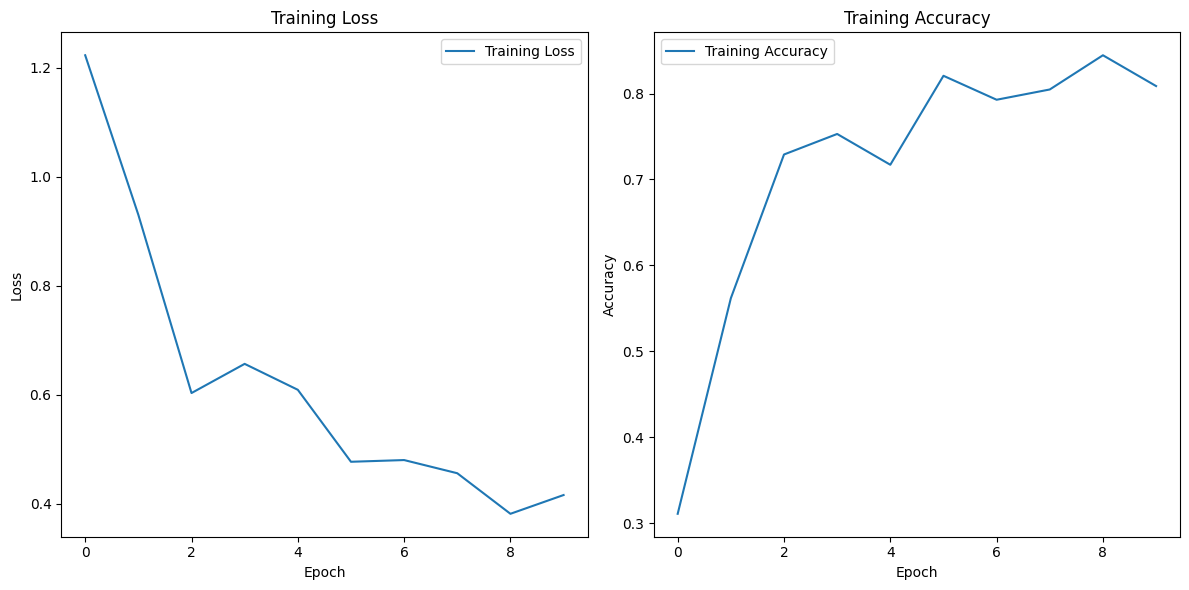

In [12]:
import matplotlib.pyplot as plt

# Access the history object that was returned after training the model
history = model.history

# Plot the loss and accuracy during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##Testing

Load the saved model

In [13]:
from tensorflow.keras.models import load_model

loaded_model = load_model('trained_model.h5')


Set up the test data using ImageDataGenerator


In [15]:
test_path = 'test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Make sure to set shuffle to False to get correct labels for evaluation
)


Found 66 images belonging to 3 classes.


Evaluate the model on the test data

In [16]:
loss, accuracy = loaded_model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


3/3 [==============================] - 1s 284ms/step - loss: 0.3965 - accuracy: 0.7879
Test Loss: 0.3965
Test Accuracy: 0.7879


3/3 [==============================] - 3s 679ms/step
Test Accuracy: 0.7879


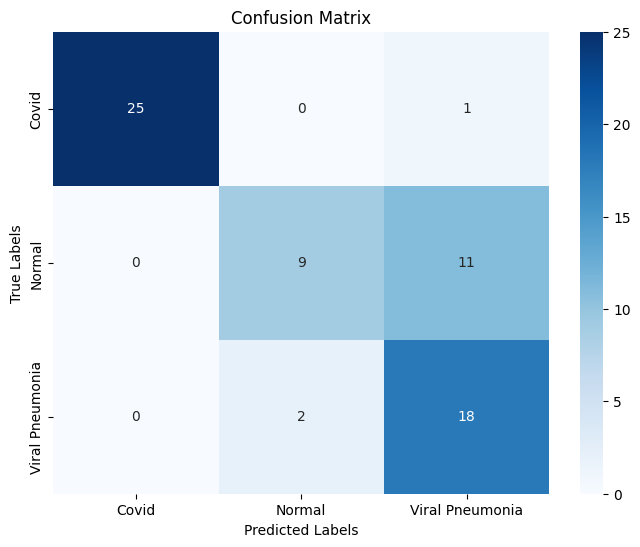

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Get the true labels and predictions for the test data
y_true = test_generator.classes
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
class_names = list(test_generator.class_indices.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
